# 미래에셋 코드

## 기본세팅

In [1]:
import os
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import datetime
#기본 사용 모듈

plt.style.use('fivethirtyeight')
fm.get_fontconfig_fonts()
font_location = './Fonts/nanum.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
plt.rc('xtick', labelsize = 8)
#그래프 한글 허용 및 기본 설정

print('Graph Setting Completed')

df0 = pd.read_csv('./data/stocks.csv', index_col = ['index'])
df1 = pd.read_csv('./data/trade_train.csv', index_col = 0)
df1 = df1.drop(df1[df1['종목번호'] == 'A204990'].index).reset_index(drop = True)
#기본 데이터 리딩

print('DataFrame Setting Completed')

name_list = list(set(df0['종목명']))
#데이터 내 포함되어 있는 주식 종목명

candidate_list = sorted(list(set(df0[df0['20년7월TOP3대상여부'] == 'Y']['종목번호'])))

print('Some List Setting Completed')

# catCode_dic = {}
# size = ['대', '중', '소']
# for i in range(3) :
#     catCode_dic[i] = {}
#     for j in set(df0['종목번호']) :
#         temp = list(df0[df0['종목번호'] == j]['표준산업구분코드_'+ size[i] +'분류'])
#         catCode_dic[i][j] = temp[0]
#         if (len(set(temp)) != 1) : print(j, temp)
# #종목번호와 매치시킨 분류코드
# #catCode_dic[0]['종목번호'] : 종목번호의 표준 산업구분코드

name_code_dic = {}
code_name_dic = {}
for i in name_list :
    temp = list(df0[df0['종목명'] == i]['종목번호'])
    name_code_dic[i] = temp[0]
    code_name_dic[temp[0]] = i
#종목명 및 종목번호 매치시킨 딕셔너리 생성

group_dic = {}
for i in range(1,49) :
    name = 'MAD' + str(i).zfill(2)
    group_dic[name] = df1[df1['그룹번호'] == name]
#각 그룹 데이터 프레임
        
print('Some Dictionary Setting Completed')

def drawStock(stock_code) :
    best_df = df0[df0['종목번호'] == stock_code]
    x = [str(i) for i in list(best_df['기준일자'])]
    y = [list(best_df['종목시가'])]
    y.append(list(best_df['종목종가']))
    y.append(list(best_df['종목고가']))
    y.append(list(best_df['종목저가']))
    y0 = list(best_df['거래량'])

    color = ['blue', 'red', 'yellow', 'black']

    f,ax=plt.subplots(2,1,figsize=(40,80))
    for i in range(4) :
        ax[0].plot(x, y[i], linewidth = 3, color=color[i])
        ax[0].tick_params(axis='x', labelrotation=90)
    ax[1].plot(x, y0, linewidth = 3, color='black')
    ax[1].tick_params(axis='x', labelrotation=90)
    plt.title(stock_code)
    plt.show()
#stock_data를 이용해 그래프 그리기

print('All Setting Completed')

#datetime.date(2020,7,1) + datetime.timedelta(days = 1)).strftime('%Y%m%d')

Graph Setting Completed
DataFrame Setting Completed
Some List Setting Completed
Some Dictionary Setting Completed
All Setting Completed


## 테마주 딕셔너리 생성

In [3]:
stocks = df0.copy()
thema = ['대선', '코로나', '언택트', '백신', '미래산업', '인플루언서', '미중무역', '돼지열병_흑사병', '철강', '애국', '한한령', '대북', '오일', '무속성']
#대선 : 이낙연, 이재명 등 영향력 있는 정치인 관련주
#미래산업 : 반도체, 디지털 뉴딜, 수소차, 2차전지 등 미래산업 관련주, 삼성 퀄컴 최신 스냅드래곤 875G 삼성전자 파운드리로 양산 예정에 따른 수혜주
#법 : 공인인증서 폐지 관련 수혜주
#인플루언서 : 정세균 국무총리 지하 고속도로 개발 언급, 새만금 국제공항 건설 추진 확정
#한한령 : 중국서 한류를 제하는 법(한한령)이 해제된다는 가설에 따른 수혜주
def dic_add(stock_name, ind) :
    if stock_name not in stock_dic.keys() : stock_dic[stock_name] = []
    if thema[ind] not in stock_dic[stock_name] : stock_dic[stock_name].append(thema[ind])
        
name_list = list(set(stocks['종목명']))
        
thema_list = [list()] * len(thema)
thema_list[0] = ['에이텍', '남선알미늄', '티케이케미칼', '이월드', '한창제지', '티비씨', '덕신하우징', '한국팩키지', '한네트', '한국프랜지', '고려산업', 'KNN', '디지틀조선', '하츠', '벽산', '서연', '서연탑메탈', '모베이스', '모베이스전자', '아이크래프트', '덕성', '덕성우', '태양금속', '남선알미우', '국영지앤엠', '까스텔바작', '서원', '대창', '에쎈테크', 'SDN', '남화토건', '남화산업', '범양건영', '주연테크', '부국철강', '승일', '신신제약', '케이씨티', '코리아나', '이화공영', 'KT서브마린', '중앙에너비스', '장원테크', '캠시스', '정다운', '지엘팜텍', '이루온', '티플랙스', '엠게임', '서린바이오', '우진', '진흥기업', '써니전자', '안랩', '까뮤이앤씨', '오픈베이스', '링네트', '우성사료', '화인베스틸', '보해양조', '풍강', 'YBM넷', '동아지질', '오리엔트바이오', '제이엠아이', '아가방컴퍼니', '대양금속', 'OQP', '부방', '아세아텍', '알에프세미', '이구산업', '국일신동']
thema_list[1] = ['GV', '화승인더', '메지온', 'HRS', '크린앤사이언스', '인피니트헬스케어', '셀바스헬스케어', '서울바이오시스', '엔에스엔', '셀루메드', '제이엠아이', '국동', '오리엔트바이오', '슈프리마', '웰바이오텍', '마크로젠', '나노엔텍', '서린바이오', '국제약품', 'KGETS', '인선이엔티', '와이엔텍', '코엔텍', '대상', '씨티씨바이오', '티앤알바이오팹', '유유제약', '파버나인', '씨유메디칼', '메디아나', '멕아이씨에스', '케이씨티', '동양', '휴메딕스', '셀트리온헬스케어', '세틀뱅크', '케이엠제약', '오공', '깨끗한나라', '모나리자', '케이엠', '톱텍', '웰크론', '엔브이에이치코리아', '창해에탄올', 'MH에탄올', '한국알콜', '인트로메딕', '마이크로디지탈', '우리들휴브레인', '로고스바이오', '필로시스헬스케어', '지노믹트리', '넥스트BT', '인트론바이오', '오상자이엘', '수젠텍', '피씨엘', '녹십자엠에스', '랩지노믹스', '미코', '씨젠', '바디텍메드', '바이오니아', 'EDGC', '레몬', '오텍', 'GH신소재', '우정바이오']
thema_list[2] = ['케어랩스', 'NHN', '팬오션', '에코마케팅', 'NHN한국사이버결제', '서울식품', '피씨디렉트', '네오펙트', '알에프세미', 'KG모빌리언스', '컴퍼니케이', '투비소프트', '인성정보', '한국맥널티', '삼륭물산', '이트론', '이씨에스', '이마트', '디앤씨미디어', '비트컴퓨터', '태림포장', '태평양물산', 'GS리테일', '풀무원', '삼양식품', '삼천리자전거', '콜마비앤에이치', '팜스빌', '뉴트리', '에이치엘사이언스', '노바렉스', '비상교육', '메가스터디', '메가엠디', '아이스크림에듀', 'YBM넷', '아프리카TV', '네스엠', '플레이위드', '네오위즈', '미스터블루', '룽투코리아', '더블유게임즈', '미투온', '드래곤플라이', '선데이토즈', '와이제이엠게임즈', '액션스퀘어', '조이시티', '넷게임즈', '넥슨지티', '펄어비스', '넷마블', '엔씨소프트', '엠게임', '위메이드', '웹젠', '컴투스', '카페24', '코리아센터', '다날', 'KG이니시스', 'NAVER', '카카오']
thema_list[3] = ['파멥신', '삼성바이오로직스', '현대약품', '삼일제약', 'JW신약', '대정화금', '신테카바이오', '셀트리온제약', '펩트론', '테라젠이텍스', '안트로젠', '프로스테믹스', '카이노스메드', '경남제약', '에이프로젠KIC', '에이프로젠H&G', '금호에이치티', '아이큐어', '셀리버리', '에이프로젠제약', '바이온', '인스코비', '에이치엘비', 'SK디스커버리우', 'SV인베스트먼트', '경남제약헬스케어', '비케이탑스', '골드퍼시픽', '메드팩토', '한미사이언스', '유바이오로직스', '삼성제약', '유한양행', '이연제약', '동구바이오제약', '알리코제약', '안국약품', '동성제약', '한올바이오파마', 'CMG제약', '명문제약', '노터스', '뉴지랩', 'JW중외제약', '제일약품', '종근당', '강스템바이오텍', '화일약품', '앱클론', '유틸렉스', '코미팜', '네이처셀', '제노포커스', '영진약품', '대원제약', '경동제약', '신일제약', '한국유니온제약', '일신바이오', 'SK디스커버리', '녹십자웰빙', '녹십자랩셀', '녹십자셀', '진원생명과학', '레고켐바이오', '유나이티드제약', '텔콘RF제약', '진양제약', '크리스탈', '현대바이오', '대웅제약', '대웅', '일양약품', '제넨바이오', '바이넥스', '제넥신', '동화약품', '종근당바이오', '셀트리온', '큐리언트', '부광약품', '대화제약', '비씨월드제약', '신풍제약우', '신풍제약', '라이브플렉스', '휴온스', '아미코젠', '바이오리더스', '바이오톡스텍', '휴마시스', '진매트릭스', '바른손이앤에이', '파미셀', '에이비프로바이오', '바른손', '시노펙스', '에스맥', '녹십자', '엔지켐생명과학', 'SK케미칼우', 'SK케미칼', '아이센스', '젬백스']
thema_list[4] = ['원익큐브', '신성이엔지', '한화솔루션', '시그네틱스', '파인텍', '신흥에스이씨', '대한광통신', '우수AMS', '싸이맥스', '에이디테크놀로지', '모바일어플라이언스', '세경하이테크', '더존비즈온', '한온시스템', '하츠', '코위버', '아이에이네트웍스', '에코프로', '이노메트리', '한샘', '가비아', 'SK하이닉스', '윌링스', '씨아이에스', '평화산업', '데일리블록체인', '이엔에프테크놀로지', '미스터블루', '소프트센', '러셀', '엠게임', '케이엔제이', 'APS홀딩스', '성창오토텍', '계양전기', 'AP시스템', '덱스터', '오이솔루션', '아이앤씨', '씨앤지하이테크', '테스', '넷게임즈', '파워넷', '필옵틱스', '로보로보', '케이엠더블유', '세종텔레콤', '남성', '아이즈비전', '에코바이오', '벽산', '에프알텍', '라온시큐어', '포메탈', '에스넷', '플레이위드', '기산텔레콤', '선데이토즈', 'RFHIC', 'SK머티리얼즈', '현대모비스', '현대글로비스', '유에스티', '이오테크닉스', '엠에스오토텍', '데이타솔루션', '제이스텍', '전파기지국', '두산퓨얼셀', '인텍플러스', '유비쿼스', '쏠리드', '하나머티리얼즈', '룽투코리아', '일진다이아', '천보', '에프엔에스테크', '세원', '삼성SDI', '에프에스티', '마이크로프랜드', '서암기계공업', '파루', '스페코', '우리산업홀딩스', '드림텍', '이노인스트루먼트', '유티아이', '코스모화학', '서진시스템', '영우디에스피', '옴니시스템', '이루온', '삼기오토모티브', '코리아에프티', '에스맥', '기아차', '이엠코리아', '아이쓰리시스템', '삼진엘앤디', '효성첨단소재', '에스코넥', 'LG화학', '디에이테크놀로지', '후성', '모트렉스', '뉴로스', '현대공업', '더블유게임즈', '파인테크닉스', '다우기술', '링네트', '현대위아', '제이엔케이히터', 'KMH하이텍', '솔브레인홀딩스', '테스나', '줌인터넷', '피앤이솔루션', '에스에프에이', '에코프로비엠', 'OCI', '기가레인', '에치에프알', '칩스앤미디어', '대보마그네틱', '삼성전자', '원익QnC', '타이거일렉', '피델릭스', '테크윙', '우리산업', '포스코ICT', '앤씨앤', '오션브릿지', '코오롱머티리얼', '미투온', '펄어비스', '위메이드', '제이앤티씨', '다산네트웍스', '시노펙스', '씨에스베어링', '뉴인텍', '한일단조', '두올', '대우부품', '아이씨디', '지엔코', '케이씨텍', '엔씨소프트', '탑엔지니어링', '아이크래프트', '엘오티베큠', 'KH바텍', '대성엘텍', '월덱스', '와이솔', 'PI첨단소재', '씨에스윈드', '삼지전자', '한미반도체', '에스퓨얼셀', '텔레칩스', '유니크', '유니테스트', '이랜텍', '원익IPS', '상신이디피', '유니퀘스트', '우리로', '조이시티', '나무기술', '주성엔지니어링', '라닉스', 'KG케미칼', '드래곤플라이', 'GST', 'HB테크놀러지', '우리넷', '보성파워텍', '나노캠텍', 'ISC', '와이제이엠게임즈', '유니셈', '피피아이', '현대에너지솔루션', '유비쿼스홀딩스', '유진테크', '상아프론테크', '오픈베이스', '동아화성', 'DB하이텍', '액션스퀘어', '매직마이크로', '원익머트리얼즈', 'SDN', '명성티엔에스', '삼화콘덴서', '넷마블', '뉴파워프라즈마', '삼화전기', '웹젠', '대성파인텍', '코스모신소재', '에이스테크', '피에스케이', '일진머티리얼즈', '머큐리', '상보', '이노와이어리스', 'SKC솔믹스', '엑셈', '링크제니시스', '포스코케미칼', '레이크머티리얼즈', '엘앤에프', '유니슨', '이수페타시스', '현대차', '두산솔루스', '엔에스', '디케이티', '센트랄모텍', '풍국주정', '화신정공', '아모그린텍', '네오위즈', '아남전자', '컴투스', '넥슨지티', '동국S&C', '만도', '하나마이크론', '에스앤에스텍', '영화테크', 'SFA반도체', '위지윅스튜디오', '동운아나텍', '아이티센', '콤텍시스템', '한국전자인증', '한국정보인증', '아톤', '동진쎄미켐', '램테크놀러지', '경인양행', '켐트로스', '3S', '심텍', '마이크로컨텍솔', '두산중공업', '효성중공업', '이엔플러스', 'STX중공업', '혜인', '어보브반도체', '실리콘웍스', '엘비세미콘', '고영', '유니온머티리얼', '나무가', '하이비젼시스템', '주연테크', '지니뮤직', '포비스티앤씨', '삼성전자우', '대덕', 'SK텔레콤', 'KT', '비트컴퓨터', '두산인프라코어', 'SK이노베이션', '한화시스템', '코윈테크', '삼성SDI우', 'LG화학우', '현대차우', '국일제지', '엑사이엔씨', '엘엠에스', '덕양산업', 'UCI', '이더블유케이', '인스코비', '에스모', '두산솔루스1우', '두산솔루스2우B', '두산퓨얼셀1우', '두산퓨얼셀2우B', '메탈라이프', '쎄미시스코', '동화기업', '알에프텍', '인피니트헬스케어', '윈스', '비엠티', '쌍용정보통신', '에스에이엠티', '에스티아이', '서울반도체', '송원산업', '화승인더', '덕산테코피아', '케어랩스', '로보스타']
thema_list[5] = ['삼표시멘트', '아이에이네트웍스', '코오롱', '메디톡스', '이화공영', '삼성엔지니어링', '키이스트', '체시스', '코오롱머티리얼', '케이사인', '한국정보통신', '덕신하우징', '두산중공업', '이지바이오', '케이피엠테크', '뉴로스', '루미마이크로', '범양건영', '코오롱플라스틱', '한국정보인증', '엔바이오니아', '대화제약', '디피씨', '특수건설', '우리기술', 'GS건설', '라온시큐어', '덕양산업', '코센', '백광산업', '지란지교시큐리티', '자연과환경', '한국전자인증', '시큐브', '우원개발', '남광토건', '뉴보텍', 'KG케미칼', '베셀', '대우건설', '상아프론테크', '동아지질', '드림시큐리티', '코웨이', '코오롱생명과학', '초록뱀', 'SG세계물산', '에스텍파마', '고려시멘트', '휴네시온', '한국주철관', '시노펙스', '동양철관', 'KT서브마린', 'SH에너지화학', '텔콘RF제약', '엘비세미콘', '아이크래프트', '코오롱인더', '에스엠', '와이지엔터테인먼트', '큐브엔터', '초록뱀', '키이스트', '디피씨', '스튜디오드래곤', '에이스토리', 'IHQ', '쇼박스', 'NEW', '제이콘텐트리', '덱스터', '위지윅스튜디오', 'JYPEnt', 'CJENM', 'CJCGV', 'SMLifeDesign', 'SMC&C', '마니커에프앤지', '마니커', '체리부로', '하림', '정다운', '동우팜투테이블', '푸드나무', '한성기업', '두올', '마이크로프랜드', 'KC코트렐', '아톤', '한국화장품', '한국화장품제조', '코리아나', '클리오', '토니모리', '본느', '한국콜마', '콜마비앤에이치', '아모레퍼시픽', '아모레G', 'LG생활건강', '코스맥스', '에이블씨엔씨', '애경산업', '세화피앤씨', '제이준코스메틱', 'YGPLUS', '넥스트아이', '브이티지엠피', '신세계인터내셔날', '에스디생명공학', 'SK바이오랜드', '제로투세븐', '클래시스', 'MP한강', '아이티센', '콤텍시스템', '유라테크', '켐트로닉스', '우성사료', '원익큐브', '디케이티', '비에이치', '뉴파워프라즈마', '유티아이', '제이앤티씨', '엘이티', '파인테크닉스', '서진시스템', 'KH바텍', '파인텍', '드림텍', '세경하이테크', '상보', '에스맥', '필옵틱스', '동운아나텍', 'LG이노텍', '덕우전자', '하이비젼시스템', '아이티엠반도체', '삼성전기', '파트론', '나무가', '드림어스컴퍼니', '다나와', '파워로직스', '캠시스', '옵트론텍', '엠씨넥스', '액트로', '해성옵틱스', '레이크머티리얼즈', '경남바이오파마', '인텍플러스', '신신제약', '한독크린텍', 'SK케미칼', 'SK케미칼우', '나노엔텍', 'SK', 'SK우', 'SK디스커버리', 'SK디스커버리우', 'SK네트웍스', 'SK증권', '한국조선해양', '현대미포조선', '대우조선해양', '삼성중공업', '한진중공업', 'HSD엔진', '한국카본', '동성화인텍', '일신바이오', '서린바이오', '삼화전기', '유진기업', '한국비엔씨', '현대차', '기아차', '현대위아', '현대모비스', '코엔텍', '와이엔텍', '인선이엔티', 'KGETS', '케이씨티', '한네트', '케이씨에스', '한국전자금융', '푸른기술', '아이디스', '뉴지랩', '인콘', '켐온', '비덴트', '우리기술투자', 'SCI평가정보', '오스템임플란트', '제노레이', '아시아나IDT', '에어부산', '아시아나항공', '한국항공우주', '한화에어로스페이스', '인텔리안테크', '퍼스텍', '삼성중공우', '에이티넘인베스트', '두산인프라코어', 'SK이노베이션', '크루셜텍', '슈프리마', '디앤씨미디어', '현대차우', '아가방컴퍼니', '에스피시스템스', '세미콘라이트', '오성첨단소재', 'W홀딩컴퍼니', '삼성출판사', '경남제약', '손오공', '안트로젠', '롯데지주', '롯데지주우', '테고사이언스', '켄코아에어로스페이스', 'HRS', '이녹스첨단소재', '팬오션', '아스트']
thema_list[6] = ['유니온', '유니온머티리얼', '샘표식품', 'LG유플러스', '혜인', '티플랙스', '노바텍', '쎄노텍', '수산중공업', '포스코엠텍', '한국내화', '엘컴텍', '쌍방울', '에스맥', '태경비케이', 'KC코트렐', '샘표', '풀무원', '미래생명자원', '현대사료', '한일사료', '우성사료']
thema_list[7] = ['체시스', '이글벳', '우진비앤지', '파루', '체리부로', '제일바이오', '진바이오텍', '중앙백신', '진원생명과학', '대성미생물', '코미팜', '태경비케이', '신라에스지', '우정바이오', '국제약품', '필로시스헬스케어', 'KPX생명과학', '마니커에프앤지', '마니커', '하림', '정다운', '동우팜투테이블', '푸드나무', 'CJ씨푸드', '이지홀딩스', '우리손에프앤지']
thema_list[8] = ['POSCO', '현대제철', '동국제강', '문배철강', '부국철강', '동양철관', '대창솔루션']
thema_list[9] = ['모나미', '후성', '하이트진로홀딩스', '롯데쇼핑', '신성통상', '쌍방울', '코데즈컴바인', '그리티', '보라티알', '토박스코리아', '까스텔바작', '하이트진로홀딩스우', '하이트진로', '리드코프', 'TBH글로벌', '비비안', '삼륭물산', '동진쎄미켐', '경인양행', '램테크놀러지', '메탈라이프', '쎄미시스코', '힘스']
thema_list[10] = ['에스엠', '와이지엔터테인먼트', '큐브엔터', '초록뱀', '키이스트', '디피씨', '스튜디오드래곤', '에이스토리', 'IHQ', '쇼박스', 'NEW', '제이콘텐트리', '덱스터', '위지윅스튜디오', 'JYPEnt', 'CJENM', 'CJCGV', '한국화장품', '한국화장품제조', '코리아나', '클리오', '토니모리', '본느', '한국콜마', '콜마비앤에이치', '아모레퍼시픽', '아모레G', 'LG생활건강', '코스맥스', '에이블씨엔씨', '애경산업', '제이준코스메틱', 'YGPLUS', '넥스트아이', '브이티지엠피', '신세계인터내셔날', '에스디생명공학', 'SK바이오랜드', '제로투세븐', '클래시스', 'MP한강', '팬스타엔터프라이즈', 'SMLifeDesign', 'SMC&C', '아가방컴퍼니', '한스바이오메드']
thema_list[11] = ['대아티아이', '현대로템', '부산산업', '서암기계공업', '대호에이엘', '우원개발', '특수건설', '이화공영', '조비', '경농', '대유', '인디에프', '좋은사람들', '신원', '코데즈컴바인', '한창', '팬스타엔터프라이즈', '일신석재', '빅텍', '남선알미늄', '동양물산', '스페코', '한일단조', '휴니드', '포메탈', '퍼스텍', 'LIG넥스원', '한화에어로스페이스', '한화우', '이디티', '한국테크놀로지', '휴비스', '휴림로봇', '대창솔루션', '에이비프로바이오', '우리기술', '한전KPS', '두산중공업', '우진', '오르비텍', '이트론', '양지사', '에코마이스터', '서희건설', '풍산', '쌍용정보통신', '제룡전기']
thema_list[12] = ['삼성SDI', '대림제지', '삼성SDI우', 'LG화학', 'LG화학우', '롯데케미칼', 'SK이노베이션', 'SK네트웍스', '한화솔루션', '이수화학', '코오롱인더', '효성', '효성첨단소재', '포스코케미칼', 'SKC', '벽산', '한국전력', '아시아나항공', '아시아나IDT', '대한항공', '제주항공', '진에어', 'HDC', 'HDC현대산업개발', '한진칼', '티웨이항공', '티웨이홀딩스', '모두투어', '하나투어', 'CJ대한통운', '현대글로비스', '한진', '한솔로지스틱스', '한익스프레스', '태웅로직스', '동방', 'GS', '지어소프트', '태림포장', '대영포장', '대한항공우', '한진칼우', '흥구석유', 'SOil']

stock_dic = {}
have_prop = set()
for i in thema_list[:-1] : have_prop |= set(i)
thema_list[-1] = list(set(name_list) - have_prop)
for i in range(len(thema_list)) :
    for t in thema_list[i] :
        dic_add(t, i)

In [4]:
from varname import nameof
stock_dic = {}
thema = ['대선', '코로나', '언택트', '백신', '미래산업', '인플루언서', '미중무역', '돼지열병_흑사병', '철강', '애국', '한한령', '대북', '오일', '무속성']
#대선 : 이낙연, 이재명 등 영향력 있는 정치인 관련주
#미래산업 : 반도체, 디지털 뉴딜, 수소차, 2차전지 등 미래산업 관련주, 삼성 퀄컴 최신 스냅드래곤 875G 삼성전자 파운드리로 양산 예정에 따른 수혜주
#법 : 공인인증서 폐지 관련 수혜주
#인플루언서 : 정세균 국무총리 지하 고속도로 개발 언급, 새만금 국제공항 건설 추진 확정
#한한령 : 중국서 한류를 제하는 법(한한령)이 해제된다는 가설에 따른 수혜주
def dic_add(stock_name, ind) :
    if stock_name not in stock_dic.keys() : stock_dic[stock_name] = []
    if thema[ind] not in stock_dic[stock_name] : stock_dic[stock_name].append(thema[ind])

In [5]:
thema_list = [list()] * len(thema)
thema_list[0] = ['에이텍', '남선알미늄', '티케이케미칼', '이월드', '한창제지', '티비씨', '덕신하우징', '한국팩키지', '한네트', '한국프랜지', '고려산업', 'KNN', '디지틀조선', '하츠', '벽산', '서연', '서연탑메탈', '모베이스', '모베이스전자', '아이크래프트', '덕성', '덕성우', '태양금속', '남선알미우', '국영지앤엠', '까스텔바작', '서원', '대창', '에쎈테크', 'SDN', '남화토건', '남화산업', '범양건영', '주연테크', '부국철강', '승일', '신신제약', '케이씨티', '코리아나', '이화공영', 'KT서브마린', '중앙에너비스', '장원테크', '캠시스', '정다운', '지엘팜텍', '이루온', '티플랙스', '엠게임', '서린바이오', '우진', '진흥기업', '써니전자', '안랩', '까뮤이앤씨', '오픈베이스', '링네트', '우성사료', '화인베스틸', '보해양조', '풍강', 'YBM넷', '동아지질', '오리엔트바이오', '제이엠아이', '아가방컴퍼니', '대양금속', 'OQP', '부방', '아세아텍', '알에프세미', '이구산업', '국일신동']
thema_list[1] = ['GV', '화승인더', '메지온', 'HRS', '크린앤사이언스', '인피니트헬스케어', '셀바스헬스케어', '서울바이오시스', '엔에스엔', '셀루메드', '제이엠아이', '국동', '오리엔트바이오', '슈프리마', '웰바이오텍', '마크로젠', '나노엔텍', '서린바이오', '국제약품', 'KGETS', '인선이엔티', '와이엔텍', '코엔텍', '대상', '씨티씨바이오', '티앤알바이오팹', '유유제약', '파버나인', '씨유메디칼', '메디아나', '멕아이씨에스', '케이씨티', '동양', '휴메딕스', '셀트리온헬스케어', '세틀뱅크', '케이엠제약', '오공', '깨끗한나라', '모나리자', '케이엠', '톱텍', '웰크론', '엔브이에이치코리아', '창해에탄올', 'MH에탄올', '한국알콜', '인트로메딕', '마이크로디지탈', '우리들휴브레인', '로고스바이오', '필로시스헬스케어', '지노믹트리', '넥스트BT', '인트론바이오', '오상자이엘', '수젠텍', '피씨엘', '녹십자엠에스', '랩지노믹스', '미코', '씨젠', '바디텍메드', '바이오니아', 'EDGC', '레몬', '오텍', 'GH신소재', '우정바이오']
thema_list[2] = ['케어랩스', 'NHN', '팬오션', '에코마케팅', 'NHN한국사이버결제', '서울식품', '피씨디렉트', '네오펙트', '알에프세미', 'KG모빌리언스', '컴퍼니케이', '투비소프트', '인성정보', '한국맥널티', '삼륭물산', '이트론', '이씨에스', '이마트', '디앤씨미디어', '비트컴퓨터', '태림포장', '태평양물산', 'GS리테일', '풀무원', '삼양식품', '삼천리자전거', '콜마비앤에이치', '팜스빌', '뉴트리', '에이치엘사이언스', '노바렉스', '비상교육', '메가스터디', '메가엠디', '아이스크림에듀', 'YBM넷', '아프리카TV', '네스엠', '플레이위드', '네오위즈', '미스터블루', '룽투코리아', '더블유게임즈', '미투온', '드래곤플라이', '선데이토즈', '와이제이엠게임즈', '액션스퀘어', '조이시티', '넷게임즈', '넥슨지티', '펄어비스', '넷마블', '엔씨소프트', '엠게임', '위메이드', '웹젠', '컴투스', '카페24', '코리아센터', '다날', 'KG이니시스', 'NAVER', '카카오']
thema_list[3] = ['파멥신', '삼성바이오로직스', '현대약품', '삼일제약', 'JW신약', '대정화금', '신테카바이오', '셀트리온제약', '펩트론', '테라젠이텍스', '안트로젠', '프로스테믹스', '카이노스메드', '경남제약', '에이프로젠KIC', '에이프로젠H&G', '금호에이치티', '아이큐어', '셀리버리', '에이프로젠제약', '바이온', '인스코비', '에이치엘비', 'SK디스커버리우', 'SV인베스트먼트', '경남제약헬스케어', '비케이탑스', '골드퍼시픽', '메드팩토', '한미사이언스', '유바이오로직스', '삼성제약', '유한양행', '이연제약', '동구바이오제약', '알리코제약', '안국약품', '동성제약', '한올바이오파마', 'CMG제약', '명문제약', '노터스', '뉴지랩', 'JW중외제약', '제일약품', '종근당', '강스템바이오텍', '화일약품', '앱클론', '유틸렉스', '코미팜', '네이처셀', '제노포커스', '영진약품', '대원제약', '경동제약', '신일제약', '한국유니온제약', '일신바이오', 'SK디스커버리', '녹십자웰빙', '녹십자랩셀', '녹십자셀', '진원생명과학', '레고켐바이오', '유나이티드제약', '텔콘RF제약', '진양제약', '크리스탈', '현대바이오', '대웅제약', '대웅', '일양약품', '제넨바이오', '바이넥스', '제넥신', '동화약품', '종근당바이오', '셀트리온', '큐리언트', '부광약품', '대화제약', '비씨월드제약', '신풍제약우', '신풍제약', '라이브플렉스', '휴온스', '아미코젠', '바이오리더스', '바이오톡스텍', '휴마시스', '진매트릭스', '바른손이앤에이', '파미셀', '에이비프로바이오', '바른손', '시노펙스', '에스맥', '녹십자', '엔지켐생명과학', 'SK케미칼우', 'SK케미칼', '아이센스', '젬백스']
thema_list[4] = ['원익큐브', '신성이엔지', '한화솔루션', '시그네틱스', '파인텍', '신흥에스이씨', '대한광통신', '우수AMS', '싸이맥스', '에이디테크놀로지', '모바일어플라이언스', '세경하이테크', '더존비즈온', '한온시스템', '하츠', '코위버', '아이에이네트웍스', '에코프로', '이노메트리', '한샘', '가비아', 'SK하이닉스', '윌링스', '씨아이에스', '평화산업', '데일리블록체인', '이엔에프테크놀로지', '미스터블루', '소프트센', '러셀', '엠게임', '케이엔제이', 'APS홀딩스', '성창오토텍', '계양전기', 'AP시스템', '덱스터', '오이솔루션', '아이앤씨', '씨앤지하이테크', '테스', '넷게임즈', '파워넷', '필옵틱스', '로보로보', '케이엠더블유', '세종텔레콤', '남성', '아이즈비전', '에코바이오', '벽산', '에프알텍', '라온시큐어', '포메탈', '에스넷', '플레이위드', '기산텔레콤', '선데이토즈', 'RFHIC', 'SK머티리얼즈', '현대모비스', '현대글로비스', '유에스티', '이오테크닉스', '엠에스오토텍', '데이타솔루션', '제이스텍', '전파기지국', '두산퓨얼셀', '인텍플러스', '유비쿼스', '쏠리드', '하나머티리얼즈', '룽투코리아', '일진다이아', '천보', '에프엔에스테크', '세원', '삼성SDI', '에프에스티', '마이크로프랜드', '서암기계공업', '파루', '스페코', '우리산업홀딩스', '드림텍', '이노인스트루먼트', '유티아이', '코스모화학', '서진시스템', '영우디에스피', '옴니시스템', '이루온', '삼기오토모티브', '코리아에프티', '에스맥', '기아차', '이엠코리아', '아이쓰리시스템', '삼진엘앤디', '효성첨단소재', '에스코넥', 'LG화학', '디에이테크놀로지', '후성', '모트렉스', '뉴로스', '현대공업', '더블유게임즈', '파인테크닉스', '다우기술', '링네트', '현대위아', '제이엔케이히터', 'KMH하이텍', '솔브레인홀딩스', '테스나', '줌인터넷', '피앤이솔루션', '에스에프에이', '에코프로비엠', 'OCI', '기가레인', '에치에프알', '칩스앤미디어', '대보마그네틱', '삼성전자', '원익QnC', '타이거일렉', '피델릭스', '테크윙', '우리산업', '포스코ICT', '앤씨앤', '오션브릿지', '코오롱머티리얼', '미투온', '펄어비스', '위메이드', '제이앤티씨', '다산네트웍스', '시노펙스', '씨에스베어링', '뉴인텍', '한일단조', '두올', '대우부품', '아이씨디', '지엔코', '케이씨텍', '엔씨소프트', '탑엔지니어링', '아이크래프트', '엘오티베큠', 'KH바텍', '대성엘텍', '월덱스', '와이솔', 'PI첨단소재', '씨에스윈드', '삼지전자', '한미반도체', '에스퓨얼셀', '텔레칩스', '유니크', '유니테스트', '이랜텍', '원익IPS', '상신이디피', '유니퀘스트', '우리로', '조이시티', '나무기술', '주성엔지니어링', '라닉스', 'KG케미칼', '드래곤플라이', 'GST', 'HB테크놀러지', '우리넷', '보성파워텍', '나노캠텍', 'ISC', '와이제이엠게임즈', '유니셈', '피피아이', '현대에너지솔루션', '유비쿼스홀딩스', '유진테크', '상아프론테크', '오픈베이스', '동아화성', 'DB하이텍', '액션스퀘어', '매직마이크로', '원익머트리얼즈', 'SDN', '명성티엔에스', '삼화콘덴서', '넷마블', '뉴파워프라즈마', '삼화전기', '웹젠', '대성파인텍', '코스모신소재', '에이스테크', '피에스케이', '일진머티리얼즈', '머큐리', '상보', '이노와이어리스', 'SKC솔믹스', '엑셈', '링크제니시스', '포스코케미칼', '레이크머티리얼즈', '엘앤에프', '유니슨', '이수페타시스', '현대차', '두산솔루스', '엔에스', '디케이티', '센트랄모텍', '풍국주정', '화신정공', '아모그린텍', '네오위즈', '아남전자', '컴투스', '넥슨지티', '동국S&C', '만도', '하나마이크론', '에스앤에스텍', '영화테크', 'SFA반도체', '위지윅스튜디오', '동운아나텍', '아이티센', '콤텍시스템', '한국전자인증', '한국정보인증', '아톤', '동진쎄미켐', '램테크놀러지', '경인양행', '켐트로스', '3S', '심텍', '마이크로컨텍솔', '두산중공업', '효성중공업', '이엔플러스', 'STX중공업', '혜인', '어보브반도체', '실리콘웍스', '엘비세미콘', '고영', '유니온머티리얼', '나무가', '하이비젼시스템', '주연테크', '지니뮤직', '포비스티앤씨', '삼성전자우', '대덕', 'SK텔레콤', 'KT', '비트컴퓨터', '두산인프라코어', 'SK이노베이션', '한화시스템', '코윈테크', '삼성SDI우', 'LG화학우', '현대차우', '국일제지', '엑사이엔씨', '엘엠에스', '덕양산업', 'UCI', '이더블유케이', '인스코비', '에스모', '두산솔루스1우', '두산솔루스2우B', '두산퓨얼셀1우', '두산퓨얼셀2우B', '메탈라이프', '쎄미시스코', '동화기업', '알에프텍', '인피니트헬스케어', '윈스', '비엠티', '쌍용정보통신', '에스에이엠티', '에스티아이', '서울반도체', '송원산업', '화승인더', '덕산테코피아', '케어랩스', '로보스타']
thema_list[5] = ['삼표시멘트', '아이에이네트웍스', '코오롱', '메디톡스', '이화공영', '삼성엔지니어링', '키이스트', '체시스', '코오롱머티리얼', '케이사인', '한국정보통신', '덕신하우징', '두산중공업', '이지바이오', '케이피엠테크', '뉴로스', '루미마이크로', '범양건영', '코오롱플라스틱', '한국정보인증', '엔바이오니아', '대화제약', '디피씨', '특수건설', '우리기술', 'GS건설', '라온시큐어', '덕양산업', '코센', '백광산업', '지란지교시큐리티', '자연과환경', '한국전자인증', '시큐브', '우원개발', '남광토건', '뉴보텍', 'KG케미칼', '베셀', '대우건설', '상아프론테크', '동아지질', '드림시큐리티', '코웨이', '코오롱생명과학', '초록뱀', 'SG세계물산', '에스텍파마', '고려시멘트', '휴네시온', '한국주철관', '시노펙스', '동양철관', 'KT서브마린', 'SH에너지화학', '텔콘RF제약', '엘비세미콘', '아이크래프트', '코오롱인더', '에스엠', '와이지엔터테인먼트', '큐브엔터', '초록뱀', '키이스트', '디피씨', '스튜디오드래곤', '에이스토리', 'IHQ', '쇼박스', 'NEW', '제이콘텐트리', '덱스터', '위지윅스튜디오', 'JYPEnt', 'CJENM', 'CJCGV', 'SMLifeDesign', 'SMC&C', '마니커에프앤지', '마니커', '체리부로', '하림', '정다운', '동우팜투테이블', '푸드나무', '한성기업', '두올', '마이크로프랜드', 'KC코트렐', '아톤', '한국화장품', '한국화장품제조', '코리아나', '클리오', '토니모리', '본느', '한국콜마', '콜마비앤에이치', '아모레퍼시픽', '아모레G', 'LG생활건강', '코스맥스', '에이블씨엔씨', '애경산업', '세화피앤씨', '제이준코스메틱', 'YGPLUS', '넥스트아이', '브이티지엠피', '신세계인터내셔날', '에스디생명공학', 'SK바이오랜드', '제로투세븐', '클래시스', 'MP한강', '아이티센', '콤텍시스템', '유라테크', '켐트로닉스', '우성사료', '원익큐브', '디케이티', '비에이치', '뉴파워프라즈마', '유티아이', '제이앤티씨', '엘이티', '파인테크닉스', '서진시스템', 'KH바텍', '파인텍', '드림텍', '세경하이테크', '상보', '에스맥', '필옵틱스', '동운아나텍', 'LG이노텍', '덕우전자', '하이비젼시스템', '아이티엠반도체', '삼성전기', '파트론', '나무가', '드림어스컴퍼니', '다나와', '파워로직스', '캠시스', '옵트론텍', '엠씨넥스', '액트로', '해성옵틱스', '레이크머티리얼즈', '경남바이오파마', '인텍플러스', '신신제약', '한독크린텍', 'SK케미칼', 'SK케미칼우', '나노엔텍', 'SK', 'SK우', 'SK디스커버리', 'SK디스커버리우', 'SK네트웍스', 'SK증권', '한국조선해양', '현대미포조선', '대우조선해양', '삼성중공업', '한진중공업', 'HSD엔진', '한국카본', '동성화인텍', '일신바이오', '서린바이오', '삼화전기', '유진기업', '한국비엔씨', '현대차', '기아차', '현대위아', '현대모비스', '코엔텍', '와이엔텍', '인선이엔티', 'KGETS', '케이씨티', '한네트', '케이씨에스', '한국전자금융', '푸른기술', '아이디스', '뉴지랩', '인콘', '켐온', '비덴트', '우리기술투자', 'SCI평가정보', '오스템임플란트', '제노레이', '아시아나IDT', '에어부산', '아시아나항공', '한국항공우주', '한화에어로스페이스', '인텔리안테크', '퍼스텍', '삼성중공우', '에이티넘인베스트', '두산인프라코어', 'SK이노베이션', '크루셜텍', '슈프리마', '디앤씨미디어', '현대차우', '아가방컴퍼니', '에스피시스템스', '세미콘라이트', '오성첨단소재', 'W홀딩컴퍼니', '삼성출판사', '경남제약', '손오공', '안트로젠', '롯데지주', '롯데지주우', '테고사이언스', '켄코아에어로스페이스', 'HRS', '이녹스첨단소재', '팬오션', '아스트']
thema_list[6] = ['유니온', '유니온머티리얼', '샘표식품', 'LG유플러스', '혜인', '티플랙스', '노바텍', '쎄노텍', '수산중공업', '포스코엠텍', '한국내화', '엘컴텍', '쌍방울', '에스맥', '태경비케이', 'KC코트렐', '샘표', '풀무원', '미래생명자원', '현대사료', '한일사료', '우성사료']
thema_list[7] = ['체시스', '이글벳', '우진비앤지', '파루', '체리부로', '제일바이오', '진바이오텍', '중앙백신', '진원생명과학', '대성미생물', '코미팜', '태경비케이', '신라에스지', '우정바이오', '국제약품', '필로시스헬스케어', 'KPX생명과학', '마니커에프앤지', '마니커', '하림', '정다운', '동우팜투테이블', '푸드나무', 'CJ씨푸드', '이지홀딩스', '우리손에프앤지']
thema_list[8] = ['POSCO', '현대제철', '동국제강', '문배철강', '부국철강', '동양철관', '대창솔루션']
thema_list[9] = ['모나미', '후성', '하이트진로홀딩스', '롯데쇼핑', '신성통상', '쌍방울', '코데즈컴바인', '그리티', '보라티알', '토박스코리아', '까스텔바작', '하이트진로홀딩스우', '하이트진로', '리드코프', 'TBH글로벌', '비비안', '삼륭물산', '동진쎄미켐', '경인양행', '램테크놀러지', '메탈라이프', '쎄미시스코', '힘스']
thema_list[10] = ['에스엠', '와이지엔터테인먼트', '큐브엔터', '초록뱀', '키이스트', '디피씨', '스튜디오드래곤', '에이스토리', 'IHQ', '쇼박스', 'NEW', '제이콘텐트리', '덱스터', '위지윅스튜디오', 'JYPEnt', 'CJENM', 'CJCGV', '한국화장품', '한국화장품제조', '코리아나', '클리오', '토니모리', '본느', '한국콜마', '콜마비앤에이치', '아모레퍼시픽', '아모레G', 'LG생활건강', '코스맥스', '에이블씨엔씨', '애경산업', '제이준코스메틱', 'YGPLUS', '넥스트아이', '브이티지엠피', '신세계인터내셔날', '에스디생명공학', 'SK바이오랜드', '제로투세븐', '클래시스', 'MP한강', '팬스타엔터프라이즈', 'SMLifeDesign', 'SMC&C', '아가방컴퍼니', '한스바이오메드']
thema_list[11] = ['대아티아이', '현대로템', '부산산업', '서암기계공업', '대호에이엘', '우원개발', '특수건설', '이화공영', '조비', '경농', '대유', '인디에프', '좋은사람들', '신원', '코데즈컴바인', '한창', '팬스타엔터프라이즈', '일신석재', '빅텍', '남선알미늄', '동양물산', '스페코', '한일단조', '휴니드', '포메탈', '퍼스텍', 'LIG넥스원', '한화에어로스페이스', '한화우', '이디티', '한국테크놀로지', '휴비스', '휴림로봇', '대창솔루션', '에이비프로바이오', '우리기술', '한전KPS', '두산중공업', '우진', '오르비텍', '이트론', '양지사', '에코마이스터', '서희건설', '풍산', '쌍용정보통신', '제룡전기']
thema_list[12] = ['삼성SDI', '대림제지', '삼성SDI우', 'LG화학', 'LG화학우', '롯데케미칼', 'SK이노베이션', 'SK네트웍스', '한화솔루션', '이수화학', '코오롱인더', '효성', '효성첨단소재', '포스코케미칼', 'SKC', '벽산', '한국전력', '아시아나항공', '아시아나IDT', '대한항공', '제주항공', '진에어', 'HDC', 'HDC현대산업개발', '한진칼', '티웨이항공', '티웨이홀딩스', '모두투어', '하나투어', 'CJ대한통운', '현대글로비스', '한진', '한솔로지스틱스', '한익스프레스', '태웅로직스', '동방', 'GS', '지어소프트', '태림포장', '대영포장', '대한항공우', '한진칼우', '흥구석유', 'SOil']

stock_dic = {}
have_prop = set()
for i in thema_list[:-1] : have_prop |= set(i)
thema_list[-1] = list(set(name_list) - have_prop)
for i in range(len(thema_list)) :
    for t in thema_list[i] :
        dic_add(t, i)

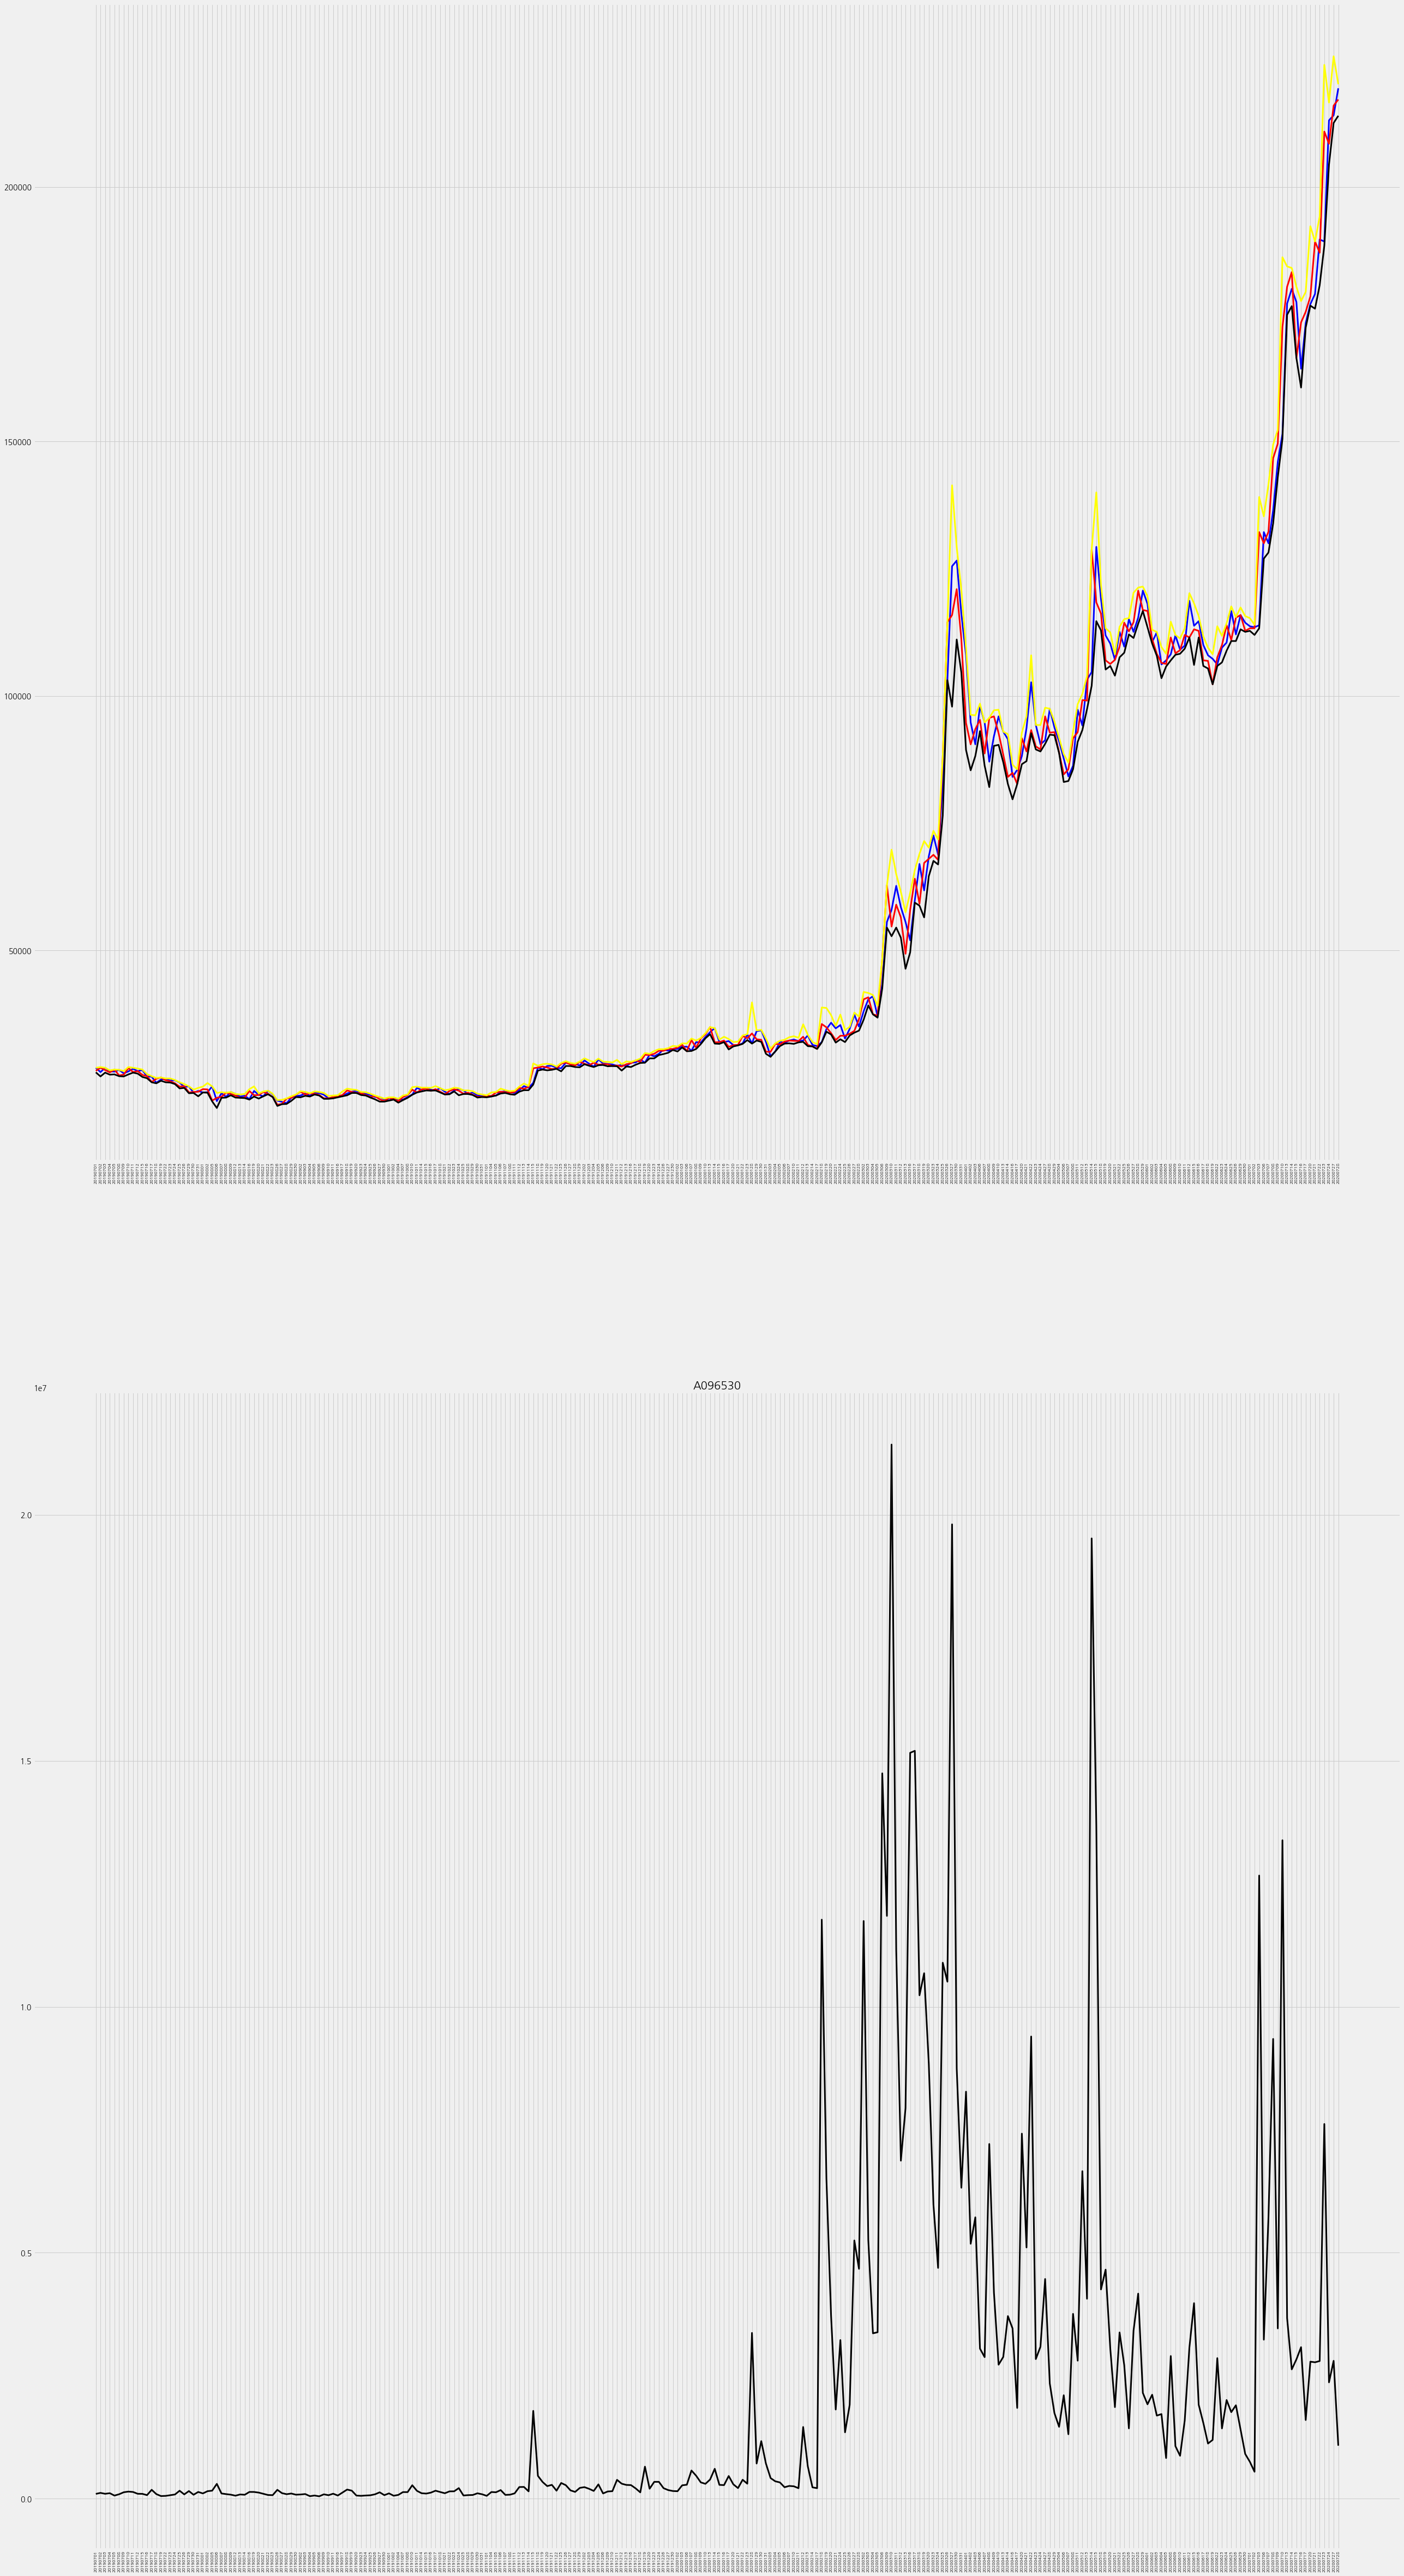

In [6]:
drawStock(name_code_dic['씨젠'])

### 무속성 주식

In [7]:
# print([i for i in map(lambda i : code_name_dic[i], candidate_list) if i not in (set(temp) & set(map(lambda i : code_name_dic[i], candidate_list)))])
print([i for i in name_list if i not in (set(temp) & set(name_list))])

['플레이위드', '한국화장품제조', '센트랄모텍', '두산솔루스1우', '퓨쳐스트림네트웍스', '디케이티', '두산솔루스2우B', '한솔테크닉스', '피엔티', '덕성우', '롯데지주', '피씨엘', '삼륭물산', 'SK증권', '유엔젤', '메드팩토', '중앙에너비스', '티웨이홀딩스', '대한항공우', '오텍', '파마리서치프로덕트', '이수화학', '비덴트', '웅진씽크빅', '한국주철관', '한국바이오젠', '한샘', '미래생명자원', '피앤이솔루션', '링크제니시스', '메이슨캐피탈', '아시아나항공', '이수페타시스', '뷰웍스', '대한항공', '티케이케미칼', 'SV인베스트먼트', '레몬', '보락', '한국내화', '코미팜', '엠씨넥스', '브이티지엠피', '일지테크', '삼성SDS', '샘표식품', '신풍제약', '아모그린텍', '네패스', 'HRS', '유니온머티리얼', '베셀', '민앤지', '제로투세븐', '극동유화', '퓨전', '에코바이오', '아이앤씨', '유비쿼스홀딩스', '대창', '케이피에스', '한네트', '큐리언트', '이지홀딩스', '퍼스텍', '넥슨지티', '나무가', '덕양산업', '에스엠', '바이오니아', '휴림로봇', '포티스', '루미마이크로', '메디톡스', '제이스텍', '효성첨단소재', '카카오', '티플랙스', '신원', '남화산업', '종근당', '비엠티', '덕성', '영진약품', '코엔텍', '뉴로스', '유진투자증권', '한송네오텍', '서울바이오시스', '현대일렉트릭', '신한지주', '하츠', '국일신동', '백광산업', '마니커', '이화공영', '체시스', '아이즈비전', '에코마이스터', '큐브엔터', '인선이엔티', '두산밥캣', '케이엔제이', '웰크론', '엔지켐생명과학', 'SOil', '셀트리온헬스케어', '종근당바이오', '애경산업', '카페24', '우진', '제이씨현시스템', '비상교육', '큐캐피탈', '넷마블', '리메드', '미스터블루', '엑사이엔씨', 'KH바텍

### 테마별 주식 속성 부여

In [8]:
#thema = ['대선', '코로나', '미래산업', '인플루언서', '미중무역', '돼지열병_흑사병', '철강', '애국', '한한령', '대북', '오일', '무속성']

edit_num = thema.index('미래산업')
i = ''
n = len(thema_list[edit_num])

while (i != '끝') :
    i = input()
    print((i in name_list), (i not in thema_list[edit_num]))
    if (i in name_list) & (i not in thema_list[edit_num]) : thema_list[edit_num].append(i)

if n != len(thema_list[edit_num]) : print(nameof(thema_list)+'['+str(edit_num)+']'+' = ' + str(thema_list[edit_num]) + '\n',len(thema_list[edit_num]))

끝
False True


In [9]:
#thema = ['대선', '코로나', '미래산업', '인플루언서', '미중무역', '돼지열병_흑사병', '철강', '애국', '한한령', '대북', '오일', '무속성']
edit_num = thema.index('인플루언서')
edit_num2 = thema.index('미래산업')
i = ''
n = len(thema_list[edit_num])
m = len(thema_list[edit_num])

while (i != '끝') :
    i = input()
    print((i in name_list), (i not in thema_list[edit_num]))
    if (i in name_list) & (i not in thema_list[edit_num]) : thema_list[edit_num].append(i)
    print((i in name_list), (i not in thema_list[edit_num2]))
    if (i in name_list) & (i not in thema_list[edit_num2]) : thema_list[edit_num2].append(i)

if n != len(thema_list[edit_num]) : print(nameof(thema_list)+'['+str(edit_num)+']'+' = ' + str(thema_list[edit_num]) + '\n',len(thema_list[edit_num]))
if m != len(thema_list[edit_num2]) : print(nameof(thema_list)+'['+str(edit_num2)+']'+' = ' + str(thema_list[edit_num2]) + '\n',len(thema_list[edit_num2]))

끝
False True
False True
thema_list[4] = ['원익큐브', '신성이엔지', '한화솔루션', '시그네틱스', '파인텍', '신흥에스이씨', '대한광통신', '우수AMS', '싸이맥스', '에이디테크놀로지', '모바일어플라이언스', '세경하이테크', '더존비즈온', '한온시스템', '하츠', '코위버', '아이에이네트웍스', '에코프로', '이노메트리', '한샘', '가비아', 'SK하이닉스', '윌링스', '씨아이에스', '평화산업', '데일리블록체인', '이엔에프테크놀로지', '미스터블루', '소프트센', '러셀', '엠게임', '케이엔제이', 'APS홀딩스', '성창오토텍', '계양전기', 'AP시스템', '덱스터', '오이솔루션', '아이앤씨', '씨앤지하이테크', '테스', '넷게임즈', '파워넷', '필옵틱스', '로보로보', '케이엠더블유', '세종텔레콤', '남성', '아이즈비전', '에코바이오', '벽산', '에프알텍', '라온시큐어', '포메탈', '에스넷', '플레이위드', '기산텔레콤', '선데이토즈', 'RFHIC', 'SK머티리얼즈', '현대모비스', '현대글로비스', '유에스티', '이오테크닉스', '엠에스오토텍', '데이타솔루션', '제이스텍', '전파기지국', '두산퓨얼셀', '인텍플러스', '유비쿼스', '쏠리드', '하나머티리얼즈', '룽투코리아', '일진다이아', '천보', '에프엔에스테크', '세원', '삼성SDI', '에프에스티', '마이크로프랜드', '서암기계공업', '파루', '스페코', '우리산업홀딩스', '드림텍', '이노인스트루먼트', '유티아이', '코스모화학', '서진시스템', '영우디에스피', '옴니시스템', '이루온', '삼기오토모티브', '코리아에프티', '에스맥', '기아차', '이엠코리아', '아이쓰리시스템', '삼진엘앤디', '효성첨단소재', '에스코넥', 'LG화학', '디에이테크놀로지', '후성', '모트렉스', '뉴로스', '현대공업', '더블유게임즈', '파인테크닉스

### 각 주식에 속성부여

In [10]:
from collections import Counter
def test(test_list) :
    print(Counter(list(map(str, map(lambda i : stock_dic[i], test_list)))))
test_list = ['에이치엘비', 'KPX생명과학', '모나미', '서암기계공업', '이디티', '룽투코리아', '휴네시온', '인디에프', '국일제지', '이트론', '미래산업', '대모', '엠아이텍', '윌링스', '액션스퀘어', '바른손', '양지사', 'TBH글로벌', '켐트로스', '드림시큐리티', '미스터블루', '보라티알', 'UCI', 'CJ씨푸드', '아가방컴퍼니', '서연탑메탈', '이더블유케이', '이엔플러스', '남성', '한화에스비아이스팩', '에스피시스템스', '아이디스', '씨앤지하이테크', '인스코비', '셀루메드', '인트론바이오', '평화산업', 'S&K폴리텍', '머큐리', '고려산업', '바이온', '현대사료', '대양금속', '신라에스지', '체시스', 'OQP', '대우부품', '한화우', '알리코제약', '오성첨단소재', '지엘팜텍', '신라젠', '에스모', '에이프로젠제약', 'W홀딩컴퍼니', '코오롱생명과학', '로고스바이오', '티앤알바이오팹', 'SMC&C', '에스퓨얼셀', '베셀', '선데이토즈', '비비안', '두산퓨얼셀', '두산퓨얼셀1우', '두산퓨얼셀2우B', '두산솔루스', '두산솔루스1우', '두산솔루스2우B', '엔에스엔', '삼성출판사', '내츄럴엔도텍', '우리넷', '녹십자엠에스', '삼륭물산', '큐캐피탈', '이월드', '제일바이오', 'MP한강', '셀리버리', '에스텍파마', '아이큐어', '한류AI센터', '네오크레마', '유니슨', '데일리블록체인', 'STX중공업', '경남제약헬스케어', '큐로홀딩스', '파버나인', '금호에이치티', '센트랄모텍', 'SK디스커버리', 'SK디스커버리우', 'SK케미칼', 'SK케미칼우', '우리기술', '토박스코리아', '한국맥널티', '서울바이오시스', '에이프로젠H&G', '럭슬', '제낙스', '범양건영', '중앙에너비스', '주연테크', '셀바스헬스케어', '국영지앤엠', '대한항공우', '한진칼우', '메탈라이프', '경남제약', '흥구석유', '서원', '삼보산업', '슈펙스비앤피', '백광산업', '깨끗한나라', '현대공업', '진양제약', '마니커에프앤지', '유에스티', '이노인스트루먼트', '태웅로직스', '케이피에스', '블러썸엠앤씨', '기산텔레콤', '에이아이비트', '카이노스메드', '대성엘텍', '인성정보', '모나리자', '신풍제약우', '자연과환경', '오공', '웰크론', '케이엠', 'MH에탄올', '이수화학', 'YBM넷', '손오공', '투비소프트', '프로스테믹스', '모바일어플라이언스', '에이비프로바이오', '부광약품', '진매트릭스', '모트렉스', '이씨에스', '휴마시스', '일양약품', '녹십자셀', '녹십자랩셀', '바이오니아', '수젠텍', '포비스티앤씨', '바이넥스', '한국테크놀로지', '안트로젠', '테라젠이텍스', '펩트론', '앱클론', '컴퍼니케이', '국보', '부방', '골드퍼시픽', '한진칼', '제노포커스', '필로시스헬스케어', '셀트리온제약', '크리스탈', '현진소재', '부국철강', '아세아텍', '티케이케미칼', '신테카바이오', '에이스토리', '까스텔바작', '에코마이스터', '플레이위드', '바른손이앤에이', '멕아이씨에스', '한국유니온제약', '레몬', '비트컴퓨터', '에스코넥', '코센', '초록뱀', '뉴보텍', '피씨엘', '메이슨캐피탈', '매직마이크로', '한진중공업', '이화공영', '특수건설', '삼표시멘트', '고려시멘트', '싸이토젠', '에이프로젠KIC', 'KMH하이텍', '넥스트BT', '플레이디', '동화기업', '삼진엘앤디', '녹십자웰빙', '제일약품', '샘표식품', '한국정보통신', '피델릭스', '문배철강', '코데즈컴바인', '지니뮤직', '이지홀딩스', '이지바이오', '케이피엠테크', '테고사이언스', '힘스', 'KG모빌리언스', '알에프텍', '스페코', '쌍용차', '롯데지주우', '엘이티', '랩지노믹스', '알에프세미', '우리들휴브레인', '대정화금', '네오펙트', '남선알미우', 'SCI평가정보', 'YGPLUS', 'SMLifeDesign', '데이타솔루션', 'EDGC', '한성기업', '피씨디렉트', '오상자이엘', '유바이오로직스', '경동제약', '한미사이언스', '아시아나IDT']
test_list = [i for i in test_list if i not in ['흥아해운','메디앙스','디에스티','럭슬','에이프런티어', '솔브레인홀딩스', '팍스넷', '에이아이비트', '셀루메드', '이에스에이', '현진소재', '제낙스', '이노와이즈', '에스모머티리얼즈', '포티스', '이큐셀', '내츄럴엔도텍', '퓨전', '신라젠', '경남제약헬스케어', '샘코', '블러썸엠앤씨']]
test(test_list)

no_prop_list = []
for i in test_list :
    if '무속성' in stock_dic[i] : no_prop_list.append(i)
print(no_prop_list)
len(no_prop_list)

Counter({"['미래산업']": 41, "['백신']": 37, "['인플루언서']": 26, "['코로나']": 24, "['무속성']": 17, "['대선']": 13, "['언택트']": 8, "['애국']": 6, "['대북']": 6, "['언택트', '미래산업']": 6, "['인플루언서', '한한령']": 6, "['백신', '인플루언서']": 6, "['오일']": 6, "['돼지열병_흑사병']": 5, "['미래산업', '대북']": 2, "['미중무역']": 2, "['인플루언서', '돼지열병_흑사병']": 2, "['인플루언서', '대북']": 2, "['대선', '언택트']": 2, "['언택트', '대북']": 1, "['대선', '인플루언서', '한한령']": 1, "['백신', '미래산업']": 1, "['언택트', '애국']": 1, "['대선', '인플루언서']": 1, "['대선', '미래산업']": 1, "['미래산업', '애국']": 1, "['백신', '대북']": 1, "['코로나', '돼지열병_흑사병']": 1, "['대선', '철강']": 1, "['대선', '애국']": 1, "['대선', '인플루언서', '대북']": 1, "['철강']": 1, "['애국', '대북']": 1, "['인플루언서', '오일']": 1})
['미래산업', '대모', '엠아이텍', '한화에스비아이스팩', 'S&K폴리텍', '큐캐피탈', '한류AI센터', '네오크레마', '큐로홀딩스', '삼보산업', '슈펙스비앤피', '케이피에스', '국보', '메이슨캐피탈', '싸이토젠', '플레이디', '쌍용차']


17

In [11]:
i = []
#thema = ['대선', '코로나', '미래산업', '인플루언서', '미중무역', '돼지열병_흑사병', '철강', '애국', '한한령', '대북', '오일', '무속성']
while (i != ['끝']) :
    i = input().split(',')
    ind = len(i)-1
    while len(i) != 1 :
        temp = thema_list[int(i.pop()) - 1]
        if (i[0] in name_list) & (i[0] not in temp) : temp.append(i[0])
        else : print(ind, (i[0] in name_list), 'Error!')
        ind -= 1

for i in range(len(thema_list) - 1):
    print(nameof(thema_list)+'['+str(i)+']'+' = ', end = '')
    print(thema_list[i])

끝
thema_list[0] = ['에이텍', '남선알미늄', '티케이케미칼', '이월드', '한창제지', '티비씨', '덕신하우징', '한국팩키지', '한네트', '한국프랜지', '고려산업', 'KNN', '디지틀조선', '하츠', '벽산', '서연', '서연탑메탈', '모베이스', '모베이스전자', '아이크래프트', '덕성', '덕성우', '태양금속', '남선알미우', '국영지앤엠', '까스텔바작', '서원', '대창', '에쎈테크', 'SDN', '남화토건', '남화산업', '범양건영', '주연테크', '부국철강', '승일', '신신제약', '케이씨티', '코리아나', '이화공영', 'KT서브마린', '중앙에너비스', '장원테크', '캠시스', '정다운', '지엘팜텍', '이루온', '티플랙스', '엠게임', '서린바이오', '우진', '진흥기업', '써니전자', '안랩', '까뮤이앤씨', '오픈베이스', '링네트', '우성사료', '화인베스틸', '보해양조', '풍강', 'YBM넷', '동아지질', '오리엔트바이오', '제이엠아이', '아가방컴퍼니', '대양금속', 'OQP', '부방', '아세아텍', '알에프세미', '이구산업', '국일신동']
thema_list[1] = ['GV', '화승인더', '메지온', 'HRS', '크린앤사이언스', '인피니트헬스케어', '셀바스헬스케어', '서울바이오시스', '엔에스엔', '셀루메드', '제이엠아이', '국동', '오리엔트바이오', '슈프리마', '웰바이오텍', '마크로젠', '나노엔텍', '서린바이오', '국제약품', 'KGETS', '인선이엔티', '와이엔텍', '코엔텍', '대상', '씨티씨바이오', '티앤알바이오팹', '유유제약', '파버나인', '씨유메디칼', '메디아나', '멕아이씨에스', '케이씨티', '동양', '휴메딕스', '셀트리온헬스케어', '세틀뱅크', '케이엠제약', '오공', '깨끗한나라', '모나리자', '케이엠', '톱텍', '웰크론', '엔브이에이치코리아', '창해에탄올', '

In [12]:
no_prop_list = ['코아스템', '에코마케팅', '삼성물산', '이구산업', '에스에이엠티', '이녹스첨단소재', '현대약품', '팬오션', '에스티큐브', '우리손에프앤지', '에스티아이', '서울반도체', '송원산업', '화승인더', '제룡전기', 'NHN', '블러썸엠앤씨', '덕산테코피아', '케어랩스', '한스바이오메드', '삼성바이오로직스', '한국가스공사', '아스트', 'GV', '파멥신', '국일신동', '현대에이치씨엔', 'F&F', '홈캐스트', '나노브릭', '에이프런티어', '로보스타', '미래나노텍', '스맥', '신화인터텍', '카스', 'LG상사', '라온피플', '아주IB투자', '한화생명', 'HMM', 'JW홀딩스', '엠아이텍', '경동나비엔', '에이디칩스', '일동제약', '신한지주', '메디프론', 'LG디스플레이', '포티스', '민앤지', '고려제약', '한국타이어앤테크놀로지', '세우글로벌', '큐로컴', '파마리서치프로덕트', 'LG헬로비전', '코디엠', '농심', '제이엘케이', '디오스텍', '케이아이엔엑스', '성신양회', '지트리비앤티', '동국알앤에스', '셀리드', '배럴', '현대엘리베이', '한솔테크닉스', '바이오솔루션', '야스', '한화에스비아이스팩', 'NE능률', '강원랜드', '삼본전자', '도이치모터스', '에스티팜', '네오크레마', '아모텍', '한화', '라파스', '영화금속', '한국금융지주', '제낙스', '신라섬유', 'NICE평가정보', '제이씨현시스템', '신라젠', '플레이디', '위닉스', '이아이디', '메디포스트', '소리바다', '키다리스튜디오', 'CJ제일제당', '맥스로텍', '팍스넷', 'NH투자증권', '대모', '올릭스', '윌비스', '와이오엠', '에이치엘비파워', '아이진', '내츄럴엔도텍', '포스코인터내셔널', '에스모머티리얼즈', '호텔신라', '유엔젤', 'TS인베스트먼트', '에이에프더블류', '슈피겐코리아', 'S&K폴리텍', '제이씨케미칼', '파라다이스', '브릿지바이오테라퓨틱스', '필룩스', '차바이오텍', '큐로홀딩스', '피엔티', '한미약품', '아진산업', '화성밸브', '코리아에셋투자증권', '삼성증권', '뷰웍스', '현진소재', '에이치엘비생명과학', '티라유텍', '두산밥캣', '앤디포스', '삼성SDS', '현대중공업지주', '샘코', '가온미디어', 'DGB금융지주', '선익시스템', '판타지오', '케이프', '엘앤씨바이오', '팜스토리', '삼보산업', '케이피에스', '퓨전', 'JW생명과학', '유비케어', '다원시스', 'CJ', '우리금융지주', '큐캐피탈', '디알젬', 'GKL', '엔케이맥스', '삼진제약', '이노와이즈', '기업은행', '네패스', '한류AI센터', '현대건설', '미래에셋대우2우B', '쌍용양회', '케이씨씨글라스', '오스코텍', '럭슬', '인바디', '이원컴포텍', 'TPC', '보령제약', 'KB금융', '금호석유', '압타바이오', '젬백스링크', '대주전자재료', '율촌화학', '젬백스지오', '대한뉴팜', '현대일렉트릭', '모비스', '자안', '흥아해운', '라이브파이낸셜', '루트로닉', '플리토', '덕산네오룩스', '이수앱지스', '대한전선', '퓨쳐스트림네트웍스', '싸이토젠', '캐리소프트', '슈펙스비앤피', '웅진씽크빅', '미래에셋대우', '이에스에이', '삼천당제약', '프로텍', '빙그레', '신세계', '제일기획', '휠라홀딩스', '웅진', '메리츠증권', '사조오양', '지니틱스', '우양', '한글과컴퓨터', '헬릭스미스', '버킷스튜디오', '루멘스', '상상인', '로보티즈', '금호전기', '인지디스플레', '하나금융지주', '에스씨엠생명과학', '광동제약', '동방선기', '태경케미컬', '대신정보통신', '나이벡', '알파홀딩스', '원익홀딩스', '덕산하이메탈', '이화전기', '해마로푸드서비스', '조아제약', '메이슨캐피탈', '대성창투', '인터플렉스', '두산', '윈팩', '고려아연', '엔피디', '한국바이오젠', '엔케이물산', '에이아이비트', '일지테크', '현대건설기계', '제주반도체', '알테오젠', '디에스티', '일진홀딩스', '오로라', '이엑스티', '옵티팜', '큐로', '우리들제약', '미래산업', '코리아써키트', 'LG전자', '삼성화재', '서울제약', '메디앙스', '제테마', '대림산업', '유진투자증권', '오리온', '젬백스', '다우데이타', '올리패스', '삼성생명', '알서포트', 'KTH', '휴젤', '리메드', '서남', 'LG', '티움바이오', '한송네오텍', '극동유화', '쌍용차', '보락', '락앤락', '디알텍', '원풍물산']
no_prop_list = [i for i in no_prop_list if i not in ['흥아해운','메디앙스','디에스티','럭슬','에이프런티어', '솔브레인홀딩스', '팍스넷', '에이아이비트', '셀루메드', '이에스에이', '현진소재', '제낙스', '이노와이즈', '에스모머티리얼즈', '포티스', '이큐셀', '내츄럴엔도텍', '퓨전', '신라젠', '경남제약헬스케어', '샘코', '블러썸엠앤씨']]
print(no_prop_list)
#thema = ['대선', '코로나', '미래산업', '인플루언서', '미중무역', '돼지열병_흑사병', '철강', '애국', '한한령', '대북', '오일', '무속성']

['코아스템', '에코마케팅', '삼성물산', '이구산업', '에스에이엠티', '이녹스첨단소재', '현대약품', '팬오션', '에스티큐브', '우리손에프앤지', '에스티아이', '서울반도체', '송원산업', '화승인더', '제룡전기', 'NHN', '덕산테코피아', '케어랩스', '한스바이오메드', '삼성바이오로직스', '한국가스공사', '아스트', 'GV', '파멥신', '국일신동', '현대에이치씨엔', 'F&F', '홈캐스트', '나노브릭', '로보스타', '미래나노텍', '스맥', '신화인터텍', '카스', 'LG상사', '라온피플', '아주IB투자', '한화생명', 'HMM', 'JW홀딩스', '엠아이텍', '경동나비엔', '에이디칩스', '일동제약', '신한지주', '메디프론', 'LG디스플레이', '민앤지', '고려제약', '한국타이어앤테크놀로지', '세우글로벌', '큐로컴', '파마리서치프로덕트', 'LG헬로비전', '코디엠', '농심', '제이엘케이', '디오스텍', '케이아이엔엑스', '성신양회', '지트리비앤티', '동국알앤에스', '셀리드', '배럴', '현대엘리베이', '한솔테크닉스', '바이오솔루션', '야스', '한화에스비아이스팩', 'NE능률', '강원랜드', '삼본전자', '도이치모터스', '에스티팜', '네오크레마', '아모텍', '한화', '라파스', '영화금속', '한국금융지주', '신라섬유', 'NICE평가정보', '제이씨현시스템', '플레이디', '위닉스', '이아이디', '메디포스트', '소리바다', '키다리스튜디오', 'CJ제일제당', '맥스로텍', 'NH투자증권', '대모', '올릭스', '윌비스', '와이오엠', '에이치엘비파워', '아이진', '포스코인터내셔널', '호텔신라', '유엔젤', 'TS인베스트먼트', '에이에프더블류', '슈피겐코리아', 'S&K폴리텍', '제이씨케미칼', '파라다이스', '브릿지바이오테라퓨틱스', '필룩스', '차바이오텍', '큐로홀딩스', '피엔티', '한미약품', '아진산업', '화

In [13]:
for i in range(len(thema_list) - 1):
    print(nameof(thema_list)+'['+str(i)+']'+' = ', end = '')
    print(thema_list[i])

thema_list[0] = ['에이텍', '남선알미늄', '티케이케미칼', '이월드', '한창제지', '티비씨', '덕신하우징', '한국팩키지', '한네트', '한국프랜지', '고려산업', 'KNN', '디지틀조선', '하츠', '벽산', '서연', '서연탑메탈', '모베이스', '모베이스전자', '아이크래프트', '덕성', '덕성우', '태양금속', '남선알미우', '국영지앤엠', '까스텔바작', '서원', '대창', '에쎈테크', 'SDN', '남화토건', '남화산업', '범양건영', '주연테크', '부국철강', '승일', '신신제약', '케이씨티', '코리아나', '이화공영', 'KT서브마린', '중앙에너비스', '장원테크', '캠시스', '정다운', '지엘팜텍', '이루온', '티플랙스', '엠게임', '서린바이오', '우진', '진흥기업', '써니전자', '안랩', '까뮤이앤씨', '오픈베이스', '링네트', '우성사료', '화인베스틸', '보해양조', '풍강', 'YBM넷', '동아지질', '오리엔트바이오', '제이엠아이', '아가방컴퍼니', '대양금속', 'OQP', '부방', '아세아텍', '알에프세미', '이구산업', '국일신동']
thema_list[1] = ['GV', '화승인더', '메지온', 'HRS', '크린앤사이언스', '인피니트헬스케어', '셀바스헬스케어', '서울바이오시스', '엔에스엔', '셀루메드', '제이엠아이', '국동', '오리엔트바이오', '슈프리마', '웰바이오텍', '마크로젠', '나노엔텍', '서린바이오', '국제약품', 'KGETS', '인선이엔티', '와이엔텍', '코엔텍', '대상', '씨티씨바이오', '티앤알바이오팹', '유유제약', '파버나인', '씨유메디칼', '메디아나', '멕아이씨에스', '케이씨티', '동양', '휴메딕스', '셀트리온헬스케어', '세틀뱅크', '케이엠제약', '오공', '깨끗한나라', '모나리자', '케이엠', '톱텍', '웰크론', '엔브이에이치코리아', '창해에탄올', 'MH

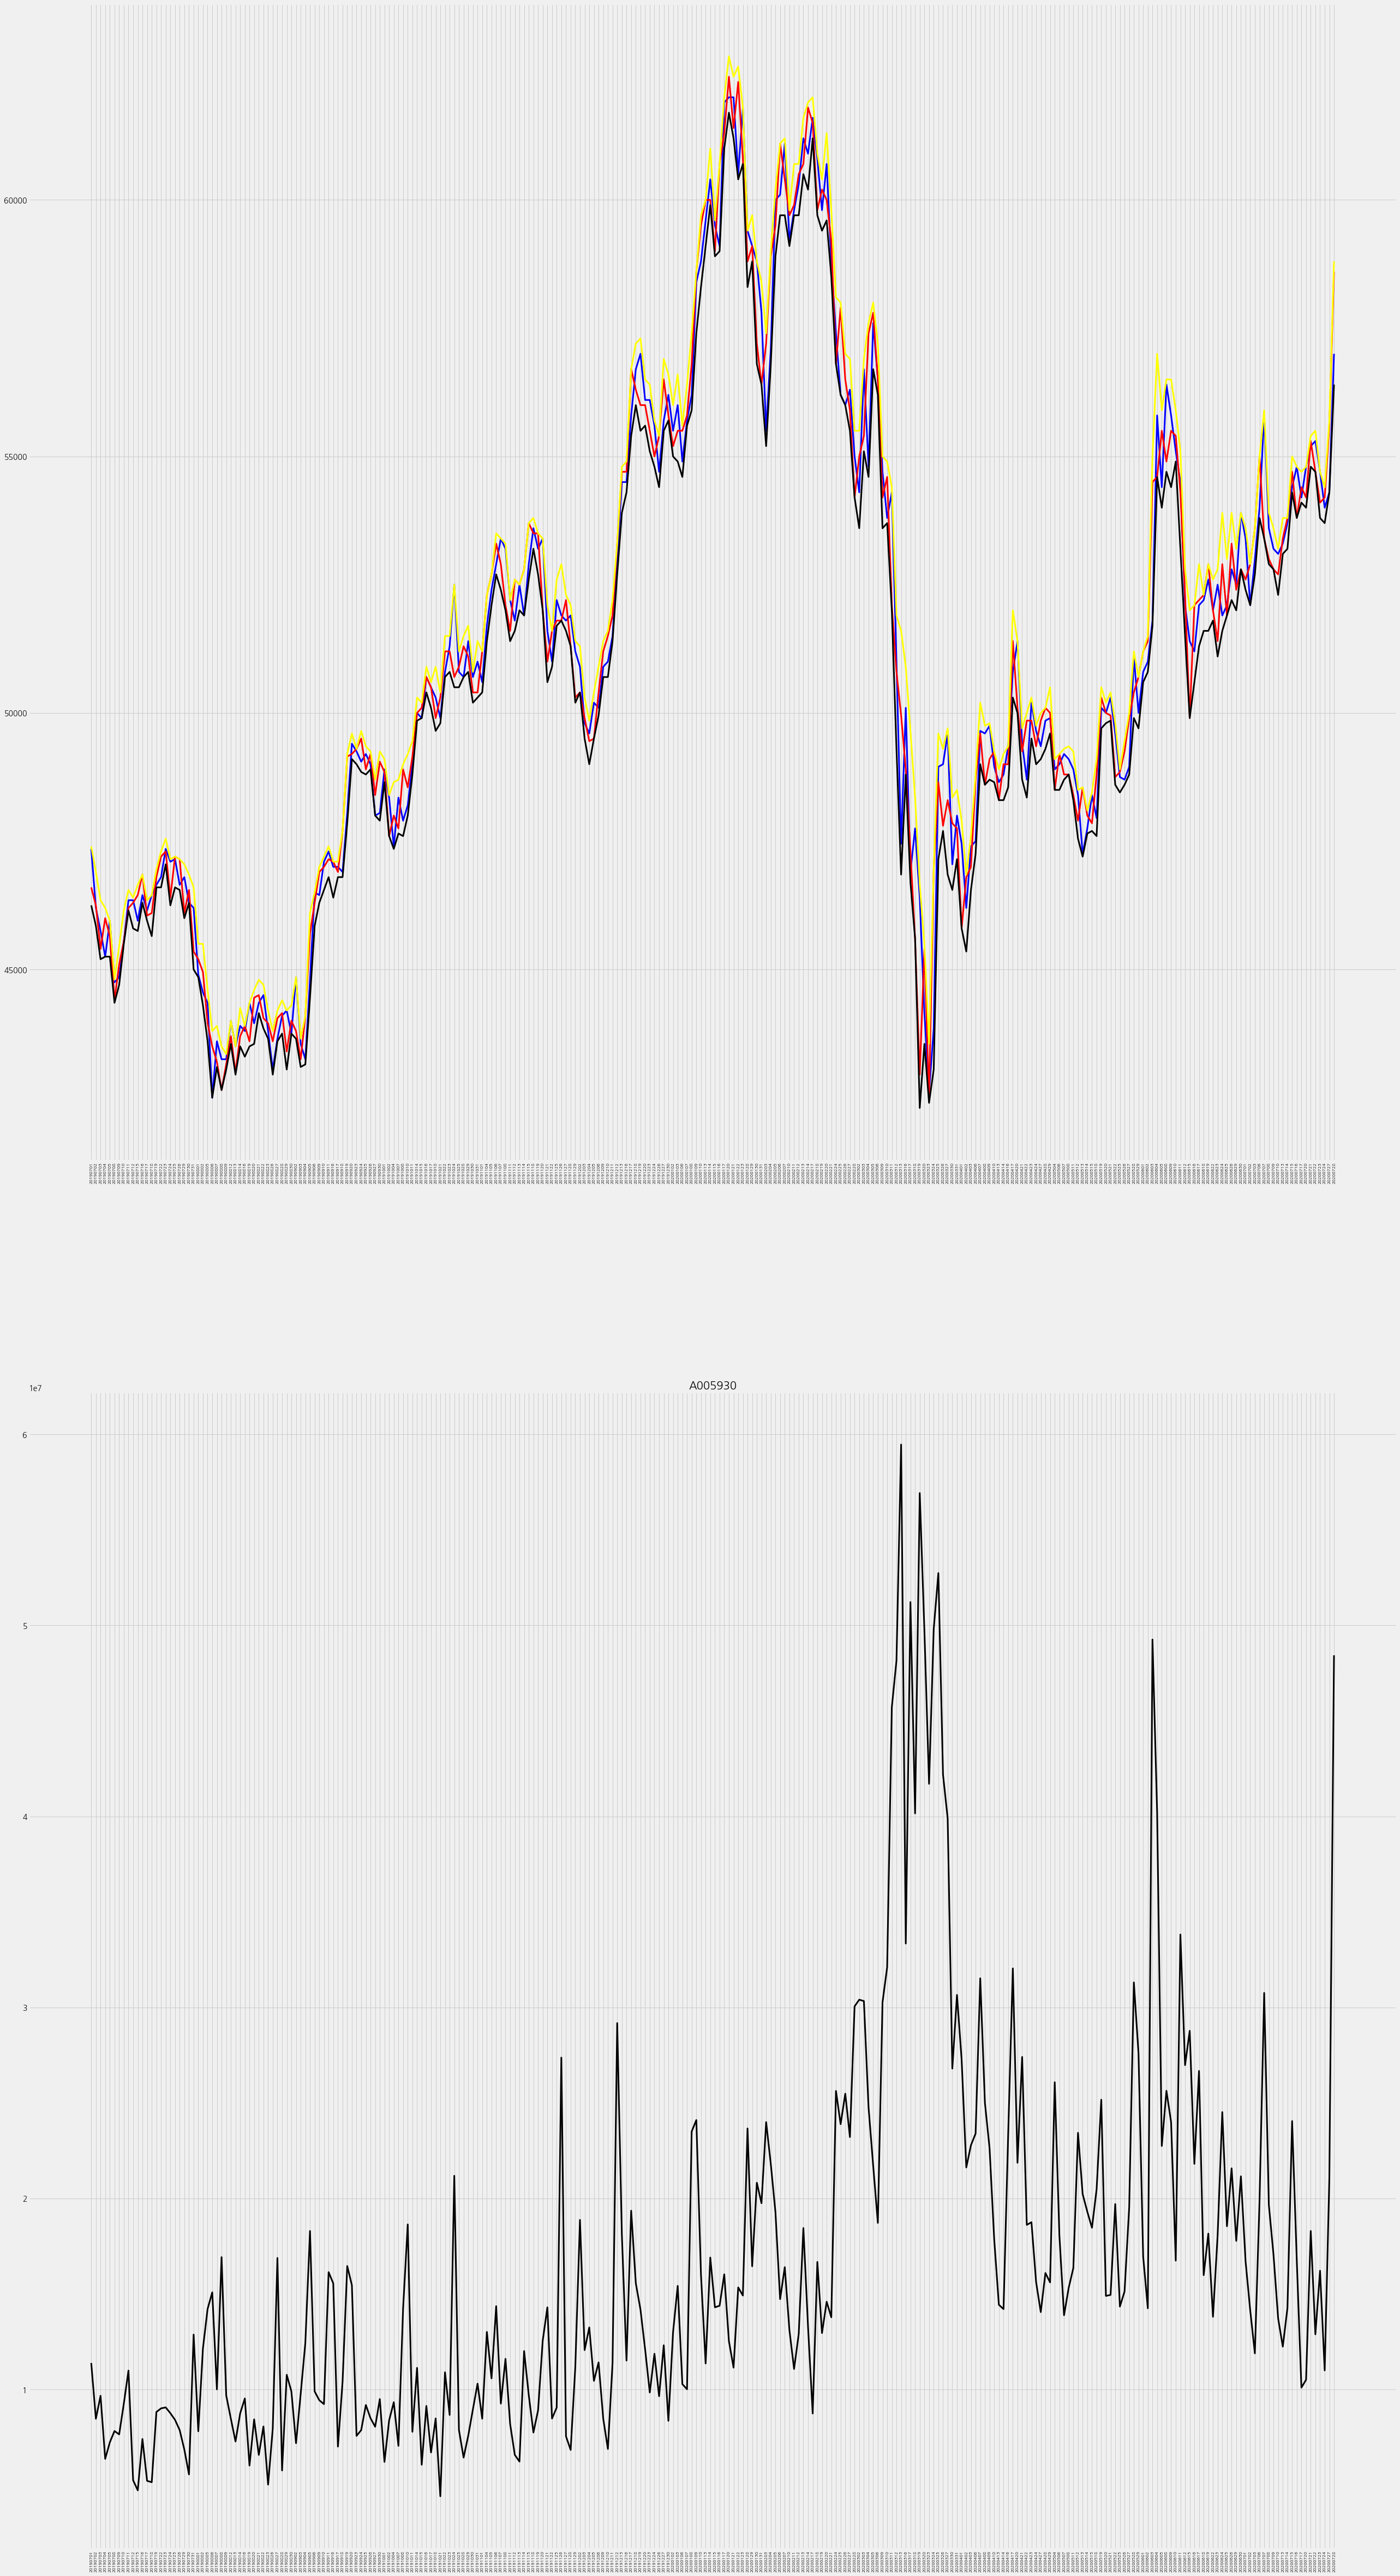

In [14]:
drawStock(name_code_dic['삼성전자'])

## 표준산업구분코드

In [16]:
dic = {}
for i in set(df0['표준산업구분코드_대분류']) : dic[i] = {}
for ind, item in df0.iterrows() :
    if item['표준산업구분코드_중분류'] in dic[item['표준산업구분코드_대분류']].keys() :
        if item['표준산업구분코드_소분류'] not in dic[item['표준산업구분코드_대분류']][item['표준산업구분코드_중분류']]:
            dic[item['표준산업구분코드_대분류']][item['표준산업구분코드_중분류']].append(item['표준산업구분코드_소분류'])
        continue
    dic[item['표준산업구분코드_대분류']][item['표준산업구분코드_중분류']] = [item['표준산업구분코드_소분류']]

In [22]:
for k, v in dic.items() :
    print('- ' + k + ' -\n')
    for k1, v1 in v.items() :
        print('▷' + k1 + '\n' + str(v1)[1:-1])
    print('\n')

- 운수 및 창고업 -

▷육상운송 및 파이프라인 운송업
'도로 화물 운송업'
▷수상 운송업
'해상 운송업'
▷항공 운송업
'항공 여객 운송업'
▷창고 및 운송관련 서비스업
'기타 운송관련 서비스업'


- 도매 및 소매업 -

▷도매 및 상품 중개업
'기타 전문 도매업', '상품 중개업', '기계장비 및 관련 물품 도매업', '상품 종합 도매업', '생활용품 도매업', '건축자재· 철물 및 난방장치 도매업', '음·식료품 및 담배 도매업'
▷소매업; 자동차 제외
'가전제품 및 정보통신장비 소매업', '종합 소매업', '기타 상품 전문 소매업', '섬유· 의복· 신발 및 가죽제품 소매업', '무점포 소매업'
▷자동차 및 부품 판매업
'자동차 판매업'


- 사업시설관리 및 사업지원 및 임대 서비스업 -

▷사업시설 관리 및 조경 서비스업
'사업시설 유지·관리 서비스업'
▷사업지원 서비스업
'여행사 및 기타 여행보조 서비스업'


- 전기· 가스· 증기 및 공기조절 공급업 -

▷전기· 가스· 증기 및 공기조절 공급업
'전기업', '연료용 가스 제조 및 배관공급업'


- 서비스업 -

▷스포츠 및 오락관련 서비스업
'유원지 및 기타 오락관련 서비스업', '스포츠 서비스업'


- 예술· 스포츠 및 여가관련 -

▷창작· 예술 및 여가관련 서비스업
'창작 및 예술관련 서비스업'


- 정보통신업 -

▷영상·오디오 기록물 제작 및 배급업
'영화· 비디오물· 방송프로그램 제작 및 배급업', '오디오물 출판 및 원판 녹음업'
▷우편 및 통신업
'전기 통신업'
▷컴퓨터 프로그래밍· 시스템 통합 및 관리업
'컴퓨터 프로그래밍· 시스템 통합 및 관리업'
▷정보서비스업
'자료처리· 호스팅· 포털 및 기타 인터넷 정보매개 서비스업', '기타 정보 서비스업'
▷출판업
'소프트웨어 개발 및 공급업', '서적· 잡지 및 기타 인쇄물 출판업'
▷방송업
'텔레비전 방송업'


- 전문· 과학 및 기술 서비스업 -

▷전문서비스업
'회사 본부 및 경영 컨설팅 서비스업', '광고업'
▷